## House Price Prediction


"The Ames Housing dataset was compiled by Dean De Cock for use in data science education". 
We will use this dataset along with advance regression techniques like **Random Forest, GridSearch, Gradient decent, Stacking Regressor** and **Neural Networks** to predict pricing of the house.

This project will help us to learn more deeply about regression along with  hyper parameters tuning and provide insite to state of art ensemble models.

As usual we will begin by importing our dependencies.

1. Numpy for numeral computations.
2. Pandas for data management.
3. Matplotlib, Seaborn and Pandas plotting for Visualization.
4. From Sklearn we will use Standard Scaler for data scaling and Log transform for outlier handling
5. Sklearns model_selection for train and test split
6. Sklearns LR, RidgeCV, Random Forest, Gradient Boosting for model building. 
7. GridsearchCV for searching the best hyperparameter.
8. From Tensorflow Keras we will import models, layers and optimizers etc for model building and optimized learning.

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.api import OLS
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LinearRegression,RidgeCV,Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor, StackingRegressor, GradientBoostingRegressor
import tensorflow as tf

**Setting seeds for code reproducibility**

In [2]:
tf.random.set_seed(4)
np.random.seed(4)
pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 500)

In [3]:
from keras.utils.np_utils import to_categorical
from tensorflow.keras import models, layers, optimizers, callbacks, regularizers

Using TensorFlow backend.


In [4]:
os.chdir("D:/Docs/Education/Data Science/Python projects/Analytics Vidya and Kaggle/house pricing")

In [5]:
pre_train=pd.read_csv("train.csv")
pre_test=pd.read_csv("test.csv")

In [6]:
pre_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Preview of the data via the **desribe()** function gives us a view at a glace.

We do note there are  lots of outliers in the variables. We will use log transformation followed by standard scalling to remove the outliers.

In [7]:
pre_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Not all variables are "Null free", so we will use Sklearns Imputer to remove the null values and impute it either bu first mode or median.

In [8]:
pre_test["SalePrice"]=0.0
ids=pre_test["Id"]
pre_test.drop(["Id"], axis=1, inplace=True)
pre_train.drop(["Id"], axis=1, inplace=True)

Adding dummy column to "Test" data set and removing the unnecessary column like "id" which doesnot contribute significantly in our analysis.

### Correlation plot

As we know our dependent variable is "SalePrice" and it is dependent on large number of factors. If we try to plot it in one scattermatrix the plots will be too inconspicuous to interpret. So we will divide the correlation plots into two halves.

1st half includes Sale price with Overall Quality, Garage Area, Total Basement and Ground Living area.

2nd half includes First floor area, Bath conditions, Year built, etc

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000296DA360CC8>,
      dtype=object)

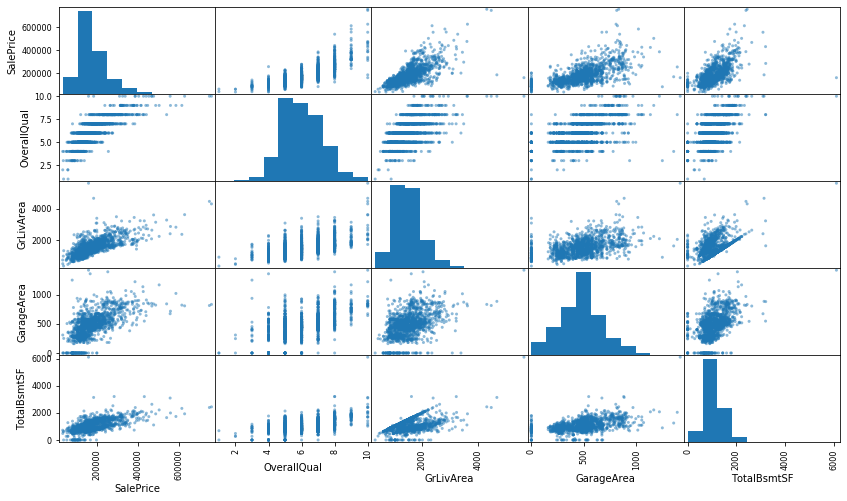

In [9]:
corr=pre_train.corr()
corr["SalePrice"].sort_values(ascending=False)
highcorvars1=["SalePrice", "OverallQual", "GrLivArea", "GarageArea","TotalBsmtSF"]
highcorvars2=["SalePrice", "1stFlrSF", "FullBath","TotRmsAbvGrd", "YearBuilt"]
scatter_matrix(pre_train[highcorvars1], figsize=(14,8))


On the first plot we see "SalePrice" is skewed towards right suggesting the presence of **outliers** and we do see **postive correlation** between "SalePrice" and "OverallQual", "GrLivArea", "GarageArea","TotalBsmtSF"

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000296DB52D208>,
      dtype=object)

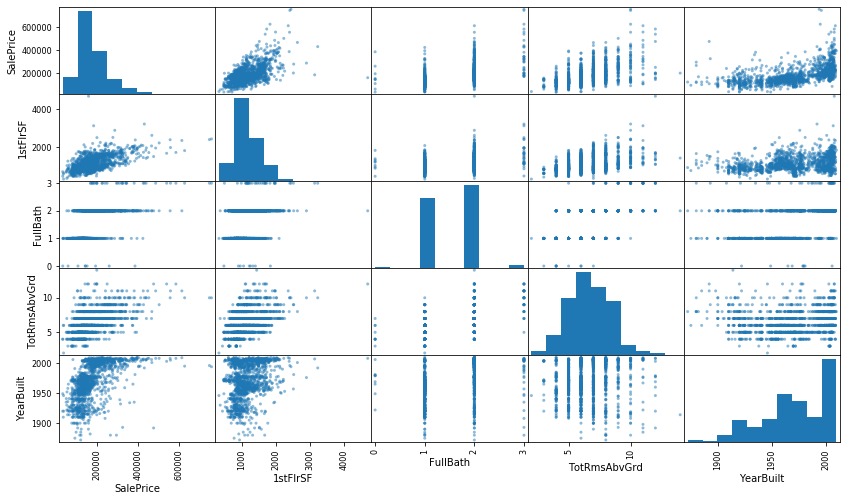

In [10]:
scatter_matrix(pre_train[highcorvars2], figsize=(14,8))

On the 2nd plot we see "SalePrice" has a **positive correlation** with "1stFlrSF", "FullBath","TotRmsAbvGrd", and **strong positive correlation** with "YearBuilt"

### Null Value imputation (Simple Imputer)

In [11]:
numeric_features=[x for x in pre_train.columns if pre_train[x].dtype!="object"]
cat_features=[x for x in pre_train.columns if pre_train[x].dtype=="object"]

In [12]:
mediamimputer=SimpleImputer(strategy="median").fit(pre_train[numeric_features])
modeimputer=SimpleImputer(strategy="most_frequent").fit(pre_train[cat_features])

Train_imputed_num=mediamimputer.transform(pre_train[numeric_features])
Train_imputed_cat=modeimputer.transform(pre_train[cat_features])
Train_imputed=pd.concat([pd.DataFrame(Train_imputed_num, columns=numeric_features), 
                         pd.DataFrame(Train_imputed_cat, columns=cat_features)], axis=1)

Test_imputed_num=mediamimputer.transform(pre_test[numeric_features])
Test_imputed_cat=modeimputer.transform(pre_test[cat_features])
Test_imputed=pd.concat([pd.DataFrame(Test_imputed_num, columns=numeric_features), 
                         pd.DataFrame(Test_imputed_cat, columns=cat_features)], axis=1)

### Train, Test and Valididation Dataset Split

In [13]:
Train_imputed["Source"]="Train"
Test_imputed["Source"]="Test"

fulldata=pd.concat([Train_imputed, Test_imputed], axis=0)
fulldata2=pd.get_dummies(fulldata, drop_first=True)

TrainOnly=fulldata2[fulldata2["Source_Train"]==1].drop(["Source_Train"], axis=1).copy() 
TestOnly=fulldata2[fulldata2["Source_Train"]==0].drop(["Source_Train"], axis=1).copy()  

#dividing into train and test(valid) data
features=[x for x in TrainOnly.columns if x!="SalePrice"]
featureY=TrainOnly["SalePrice"]
TrainX, ValidX, TrainY, ValidY=train_test_split(TrainOnly[features], featureY, train_size=0.8, random_state=1)

TestX=TestOnly[features].copy()
TestY=TestOnly["SalePrice"].copy()

In [14]:
print("X shape:",TrainX.shape, "Y shape:", TrainY.shape)
print("X shape:",ValidX.shape, "Y shape:", ValidY.shape)
print("X shape:",TestX.shape, "Y shape:", TestY.shape)

X shape: (1168, 245) Y shape: (1168,)
X shape: (292, 245) Y shape: (292,)
X shape: (1459, 245) Y shape: (1459,)


### Scaling of Data using Standard Scaler

In [15]:
STC=StandardScaler().fit(TrainX)  
TrainX_std=STC.transform(TrainX)
ValidX_std=STC.transform(ValidX)
TestX_std=STC.transform((TestX))

## Model building


## Linear Regression

Our first model will be a Linear regression model which will be used as a base line model.


In [16]:
#LR
model_1_LR=LinearRegression(normalize=False).fit(TrainX_std, TrainY)
ValidPred=model_1_LR.predict(ValidX_std)
np.sqrt(mean_squared_error(ValidY, ValidPred))

2967557855576078.0

As we see the LR model didnt perform well, we will use Random Forest with default parameters as our new baseline model

### Random Forest

In [17]:
model_2_RFR=RandomForestRegressor(random_state=4, n_jobs=-1).fit(TrainX_std, TrainY)
ValidPred=model_2_RFR.predict(ValidX_std)
np.sqrt(mean_squared_error(ValidY, ValidPred))

28860.18448956217

In [19]:
#a CV example 01
cv = StratifiedKFold(n_splits=5,shuffle=True, random_state=4)
score=cross_val_score(model_2_RFR, TrainX_std, TrainY, cv=cv, scoring="neg_root_mean_squared_error")
print(score)

C:\Users\rupan\Anaconda3\envs\tensorflowGpu\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


[-36439.25178386 -34498.17884044 -23243.27831262 -29886.94337631
 -32526.49740782]


### Hyperparameter tuning for Random Forest

**Using Grid Seach cross-validation**

In [25]:
#Gridsearch to fine tune for RandomForest
params={"n_estimators":range(800,1400,50), "max_depth":range(70,100,5), 
        "min_samples_split": range(1,9,3),
        "max_leaf_nodes": range(100,400,50)}
GridRF=GridSearchCV(estimator=RandomForestRegressor(random_state=4,  n_jobs=-1), 
                    param_grid=params, n_jobs=-1,cv=3, 
                    scoring="neg_mean_squared_error", verbose=3).fit(TrainX_std, TrainY) 

Fitting 3 folds for each of 32 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   24.6s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:  1.8min finished


In [31]:
GridRF.best_params_

{'max_depth': 75,
 'max_leaf_nodes': 40,
 'min_samples_split': 4,
 'n_estimators': 950}

#### Rebuilding the model based on hyperparameters set via the Gridseach

In [34]:
RFR=GridRF.best_estimator_
model_6_RFR=RFR.fit(TrainX_std, TrainY)
Valid_pred=model_6_RFR.predict(ValidX_std)
np.sqrt(mean_squared_error(ValidY, Valid_pred))

30309.61242382866

### Ridge CV

Ridge Regression is a technique for analyzing multiple regression data that suffer from multicollinearity*. When
multicollinearity occurs, least squares estimates are unbiased, but their variances are large so they may be far from
the true value. By adding a degree of bias to the regression estimates, ridge regression reduces the standard errors.

*Multicollinearity, or collinearity, is the existence of near-linear relationships among the independent variables. 

In [21]:
#RidgeCV to find the best Alpha
model_7_RCV=RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 10.0,100.0,1],
                    store_cv_values=True, fit_intercept=1).fit(TrainX_std, TrainY)
RCV_alphas=model_7_RCV.alpha_
RCV_alphas

100.0

In [22]:
#Ridge Regression
model_8_Rdg=Ridge(random_state=4, alpha=100).fit(TrainX_std, TrainY)
Valid_pred=model_8_Rdg.predict(ValidX_std)
np.sqrt(mean_squared_error(ValidY, Valid_pred))

31881.105904729975

### Grid Search for Hyperparameters for Gradient Boosting

In [22]:
#Gridsearch to fine tune for Gradient Boost
params={"n_estimators":range(100,2000,100),
        "learning_rate":[0.1,0.01,0.001], "loss":["ls", "lad", "huber", "quantile"]}
GridGD=GridSearchCV(estimator=GradientBoostingRegressor(random_state=4), 
                    param_grid=params, n_jobs=-2,cv=5, 
                    scoring="neg_mean_squared_error", verbose=10).fit(TrainX_std, TrainY) 

Fitting 5 folds for each of 228 candidates, totalling 1140 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done   2 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-2)]: Done   7 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-2)]: Done  12 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-2)]: Done  19 tasks      | elapsed:   13.8s
[Parallel(n_jobs=-2)]: Done  26 tasks      | elapsed:   22.8s
[Parallel(n_jobs=-2)]: Done  35 tasks      | elapsed:   37.8s
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:   57.4s
[Parallel(n_jobs=-2)]: Done  55 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-2)]: Done  66 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-2)]: Done  79 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-2)]: Done  92 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-2)]: Done 107 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-2)]: Done 122 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-2)]: Done 139 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-2)]: Done 156 tasks      | elapsed:  5

In [24]:
GridGD.best_params_

{'learning_rate': 0.1, 'loss': 'huber', 'n_estimators': 500}

### Gradient Boosting model building

Gradient boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees. It builds the model in a stage-wise fashion like other boosting methods do, and it generalizes them by allowing optimization of an arbitrary differentiable loss function.

In [26]:
GB=GridGD.best_estimator_
model_10_GB=GB.fit(TrainX_std, TrainY)
Valid_pred=model_10_GB.predict(ValidX_std)
np.sqrt(mean_squared_error(ValidY, Valid_pred))

24842.90841175133

### Stacking Regressor

Ensembling of all the above regressors

Stacked generalization consists in stacking the output of individual estimator and use a regressor to compute the final prediction. Stacking allows to use the strength of each individual estimator by using their output as input of a final estimator.

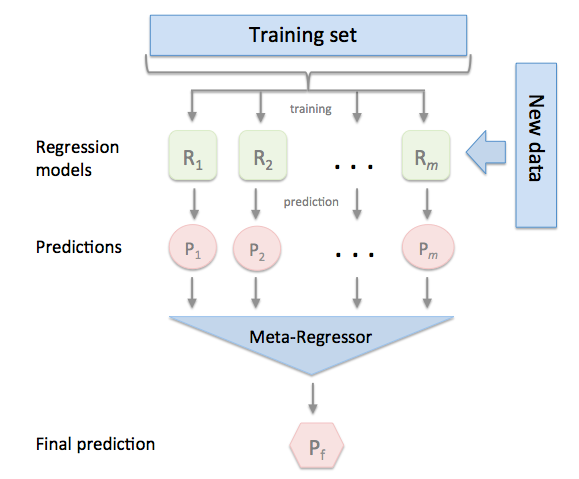


In [27]:
estimator_list=[("Lr", LinearRegression(normalize=False)),
            ("RFR",RandomForestRegressor(random_state=4,
                                  n_estimators=1350,max_depth=70, max_features="auto",
                                  max_leaf_nodes=250, min_samples_split=4)),
           ("RG", Ridge(random_state=4, alpha=100.0))]
meta=GB=GradientBoostingRegressor(loss="huber", n_estimators=500, random_state=4,
                                      learning_rate=0.1)
model_9_SR=StackingRegressor(estimators=estimator_list, 
                             final_estimator=meta, cv=3, n_jobs=-1, passthrough=True).fit(TrainX_std, TrainY)
Valid_pred=model_9_SR.predict(ValidX_std)
np.sqrt(mean_squared_error(ValidY, Valid_pred))

24943.59123672012

## Regression using Neural Networks


An ANN is based on a collection of connected units or nodes called artificial neurons, which loosely model the neurons in a biological brain. Each connection, like the synapses in a biological brain, can transmit a signal to other neurons. An artificial neuron that receives a signal and then processes it and can signal neurons connected to it. The "signal" at a connection is a real number, and the output of each neuron is computed by some non-linear function of the sum of its inputs.


Training in Neural network happens by adjusting the weights and bias terms by forward propagation and backward propagation using gradient decent and the concept of differenciation.
A basic NN equation:
    
$$ Z=Activation(Weight.X + bias) $$

Where activation can be Sigmoid, Tanh or Relu (rectified Linear unit)

The weights and bias are adjusted to minimise the error in prediction (differece between predicted output and actual output)

**For regression the last layer Should Not have a Activation function**

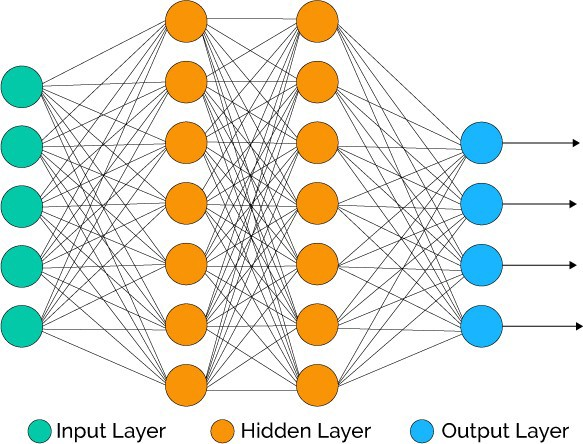

In [30]:
model_4_NN=models.Sequential()
model_4_NN.add(layers.Dense(3000, activation="relu", input_shape=(TrainX_std.shape[1],)))
model_4_NN.add(layers.Dense(3000, activation="relu", kernel_regularizer=regularizers.l1_l2(l1=1e2, l2=1e3),bias_regularizer=regularizers.l2(0.01), activity_regularizer=regularizers.l1(0.01)))
model_4_NN.add(layers.Dropout(0.4))
model_4_NN.add(layers.Dense(2000, activation="relu", kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.02),bias_regularizer=regularizers.l2(1e6), activity_regularizer=regularizers.l1(0.01)))
model_4_NN.add(layers.Dropout(0.2))
model_4_NN.add(layers.Dense(1500, activation="relu"))
model_4_NN.add(layers.Dense(1500, activation="relu", kernel_regularizer=regularizers.l1_l2(l1=0.1, l2=0.2),bias_regularizer=regularizers.l2(1e5), activity_regularizer=regularizers.l1(0.01)))
model_4_NN.add(layers.Dropout(0.2))
model_4_NN.add(layers.Dense(1500, activation="relu"))
model_4_NN.add(layers.Dropout(0.2))
model_4_NN.add(layers.Dense(1000, activation="relu", kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.02),bias_regularizer=regularizers.l2(1e5), activity_regularizer=regularizers.l1(0.01)))
model_4_NN.add(layers.Dense(800, activation="relu"))
model_4_NN.add(layers.Dense(500, activation="relu", kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.02),bias_regularizer=regularizers.l2(1e5), activity_regularizer=regularizers.l1(0.01)))
model_4_NN.add(layers.Dropout(0.2))
model_4_NN.add(layers.Dense(400, activation="relu", kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.02),bias_regularizer=regularizers.l2(1e5), activity_regularizer=regularizers.l1(0.01)))
model_4_NN.add(layers.Dense(200, activation="relu"))
model_4_NN.add(layers.Dropout(0.2))
model_4_NN.add(layers.Dense(100, activation="relu"))
model_4_NN.add(layers.Dense(1))

In [32]:
Earlystp=callbacks.EarlyStopping(monitor="loss", mode="min", patience=10)
Savemod=callbacks.ModelCheckpoint(filepath="model1.h5", monitor="val_loss", save_best_only=True)
LRP=callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.1, patience=3)

In [33]:
model_4_NN.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss="mae",metrics=["mse"])   

In [37]:
model_4_NN.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 3000)              738000    
_________________________________________________________________
dense_1 (Dense)              (None, 3000)              9003000   
_________________________________________________________________
dropout (Dropout)            (None, 3000)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 2000)              6002000   
_________________________________________________________________
dropout_1 (Dropout)          (None, 2000)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 1500)              3001500   
_________________________________________________________________
dense_4 (Dense)              (None, 1500)              2

In [38]:
hist=model_4_NN.fit(TrainX_std, TrainY, epochs=200, batch_size=32, validation_data=(ValidX_std, ValidY),
            callbacks=[Earlystp,LRP, Savemod])

Train on 1168 samples, validate on 292 samples
Epoch 1/200
1168/1168 [==============================] - 7s 6ms/sample - loss: 15424081.4658 - mse: 39292084224.0000 - val_loss: 13373175.0000 - val_mse: 38027935744.0000
Epoch 2/200
1168/1168 [==============================] - 3s 3ms/sample - loss: 11704930.0822 - mse: 39292063744.0000 - val_loss: 9996315.2192 - val_mse: 38027902976.0000
Epoch 3/200
1168/1168 [==============================] - 3s 3ms/sample - loss: 8627875.7808 - mse: 39291981824.0000 - val_loss: 7232558.1164 - val_mse: 38027776000.0000
Epoch 4/200
1168/1168 [==============================] - 3s 3ms/sample - loss: 6131959.5890 - mse: 39291174912.0000 - val_loss: 5015851.4521 - val_mse: 38020141056.0000
Epoch 5/200
1168/1168 [==============================] - 3s 3ms/sample - loss: 4102696.7295 - mse: 23366025216.0000 - val_loss: 3192032.0377 - val_mse: 4328698880.0000
Epoch 6/200
1168/1168 [==============================] - 4s 3ms/sample - loss: 2547923.9829 - mse: 3095938

Epoch 51/200
1168/1168 [==============================] - 1s 1ms/sample - loss: 27936.5767 - mse: 687090304.0000 - val_loss: 26851.9270 - val_mse: 949811648.0000
Epoch 52/200
1168/1168 [==============================] - 3s 3ms/sample - loss: 28161.5031 - mse: 823035264.0000 - val_loss: 26613.0842 - val_mse: 921982528.0000
Epoch 53/200
1168/1168 [==============================] - 3s 3ms/sample - loss: 27274.1019 - mse: 755673408.0000 - val_loss: 26550.5045 - val_mse: 903085760.0000
Epoch 54/200
1168/1168 [==============================] - 3s 3ms/sample - loss: 27831.0712 - mse: 755185728.0000 - val_loss: 26497.0549 - val_mse: 918681152.0000
Epoch 55/200
1168/1168 [==============================] - 1s 1ms/sample - loss: 27854.2750 - mse: 780738624.0000 - val_loss: 26518.5393 - val_mse: 916482944.0000
Epoch 56/200
1168/1168 [==============================] - 3s 3ms/sample - loss: 26870.9905 - mse: 706176576.0000 - val_loss: 26325.1442 - val_mse: 905440128.0000
Epoch 57/200
1168/1168 [====

In [39]:
history=hist.history
train_loss=history["loss"]
valid_loss=history["val_loss"]

train_mae=history["mse"]
valid_mae=history["val_mse"]

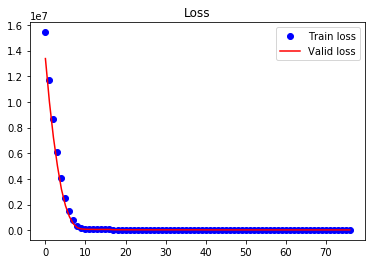

In [40]:
n=0
epoches=range(n, len(train_loss))

#loss

plt.plot(epoches, train_loss[n:], "bo", label="Train loss")
plt.plot(epoches, valid_loss[n:], "r", label="Valid loss")
plt.legend(loc="best")
plt.title("Loss")
plt.show()

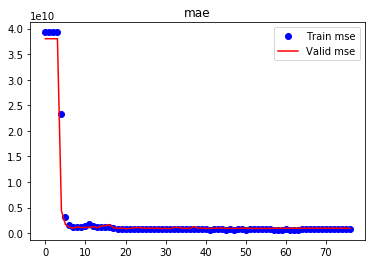

In [41]:
plt.plot(epoches, train_mae[n:], "bo", label="Train mse")
plt.plot(epoches, valid_mae[n:], "r", label="Valid mse")
plt.legend(loc="best")
plt.title("mae")
plt.show()


In [42]:
model_4_NN_L=models.load_model("model1.h5")
ValidPred=model_4_NN_L.predict(ValidX_std)
np.sqrt(mean_squared_error(ValidY, ValidPred))

30754.656080665038

### Averaging the outputs of all the models

1. Output of Neural Network with out of Stacking Regressor
2. Stacking regressor in composed or Linear regression, Random Forest and Gradient decent along with Ridge CV

In [43]:
Test_pred_GD=model_9_SR.predict(TestX_std).ravel()
Test_pred_NN=model_4_NN_L.predict(TestX_std).ravel()

In [44]:
Final_Test_pred=0.5*Test_pred_GD+0.5*Test_pred_NN

### FINAL SUBMISSION BASED IN .CSV FILE

In [48]:
submission=pd.DataFrame({"Id":ids, "SalePrice":Final_Test_pred})
submission.to_csv("house_price_NN2.csv", index=False)